### Imports

In [1]:
import os
from os import path, makedirs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [2]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/spectral_data/SMP65#010 21d 820um.csv"


In [3]:
filename = path.split("/")[-1]
filename

'SMP65#010 21d 820um.csv'

In [4]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [5]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,39312.6,23079.9,21d 820um,3.30590,0.151472,0.152071,0.152256,0.150434,0.148443,0.148183,...,0.249099,0.188047,0.122716,0.056121,0.066639,0.045116,-0.026956,-0.111846,-0.096584,-0.083653
1,39318.0,23079.9,21d 820um,3.26337,0.153604,0.156114,0.156444,0.153644,0.150513,0.150147,...,0.258185,0.235201,0.150298,0.051085,-0.035975,-0.091958,-0.209536,-0.217019,-0.166642,-0.168516
2,39323.5,23079.9,21d 820um,3.32775,0.146497,0.148817,0.150570,0.150257,0.147724,0.144483,...,0.217396,0.137882,0.046917,-0.101833,-0.155843,-0.076677,-0.113026,-0.182223,-0.094074,-0.010684
3,39328.9,23079.9,21d 820um,3.43974,0.143627,0.146395,0.147610,0.146675,0.145036,0.144313,...,-0.109112,-0.073603,-0.054719,-0.056477,-0.059897,-0.067261,-0.057933,-0.036720,-0.039439,-0.108563
4,39334.3,23079.9,21d 820um,3.28761,0.159408,0.159068,0.157939,0.156671,0.155632,0.155443,...,0.041764,0.073164,0.092949,0.067848,0.021157,0.005976,0.050284,0.115735,0.132891,0.073880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,39633.2,23595.0,21d 820um,3.21742,0.107627,0.108188,0.109352,0.110013,0.110582,0.111819,...,-0.006206,-0.024805,-0.059069,-0.084301,-0.052787,-0.010129,0.006783,0.069636,0.164251,0.201421
6140,39638.6,23595.0,21d 820um,3.27172,0.123066,0.124707,0.126645,0.127382,0.126340,0.124975,...,-0.054694,-0.124319,-0.078633,0.022690,0.110823,0.159075,0.150030,0.099369,0.074847,0.112302
6141,39644.0,23595.0,21d 820um,3.33930,0.153556,0.153999,0.154334,0.155183,0.157044,0.159237,...,-0.084711,-0.109459,-0.092260,-0.049101,0.023776,0.097812,0.111023,0.069392,0.035053,0.033140
6142,39649.5,23595.0,21d 820um,3.31965,0.164093,0.165818,0.166576,0.165902,0.163860,0.161559,...,0.164837,0.114077,0.120711,0.162803,0.195916,0.192849,0.173867,0.173931,0.194272,0.225845


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [6]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [7]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


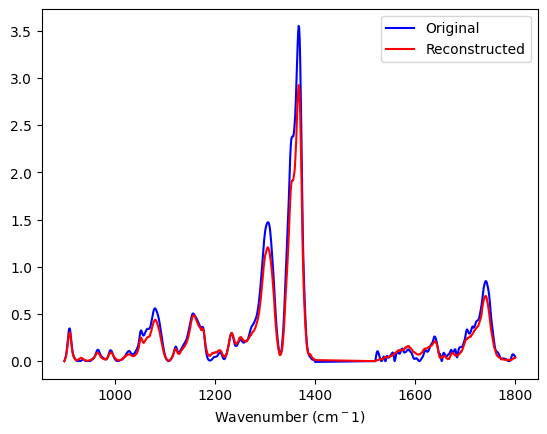

In [8]:
plt.plot(wavenumber, absorbance, c='b')
plt.plot(wavenumber, reconstructed, c='r')
plt.legend(['Original','Reconstructed'])
plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.show()

# Save results to dataframe

In [9]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

Index([ 898.0,  899.0,  900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,
        907.0,
       ...
       1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0, 1799.0,
       1800.0],
      dtype='object', length=784)


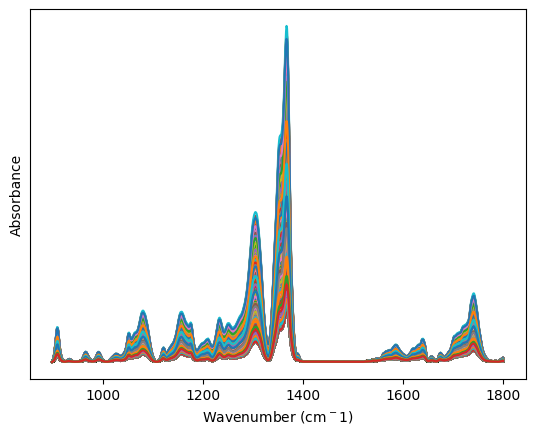

In [10]:
reconstructed=pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2])


plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.yticks([])
plt.show()

In [11]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [12]:
path_to_save = 'C:/Users/Zach/Documents/GitHub/BVAE_processed/'
makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [13]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Hyperspectra/"
makedirs(path_to_save, exist_ok=True)

hyperspectrum.to_csv(path_to_save + 'hyperspectrum_'+ filename, index=False)

In [14]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Reconstructions/"
makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)